# EDA

## Carga de datos

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tp_final_fairness_ML.utils.preprocessing import convertir_object_a_categ
import os 

ruta_archivo = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')

g_credit_data = pd.read_csv(ruta_archivo)

g_credit_data = convertir_object_a_categ(g_credit_data)

## Variables numéricas

Como primera parte de este análisis exploratorio vamos a empezar a analizar a las variables numéricas presentes en el conjunto de datos. Como primer acercamiento siempre es bueno usar la función ".describe()":

In [15]:
g_credit_data.describe()

,duration,credit_amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Por ahora no hay nada fuera de lugar, podemos notar cosas como:

* La mediana de la duración de un préstamo es de 18 meses.
* La mediana de la edad de un solicitante de préstamo es de 33 años.
* En un caso promedio un solicitante tiene un solo crédito activo en el banco pero puede extenderse hasta a 4 en un caso máximo.
* Lo común es que los solicitantes tengan bajo riesgo crediticio.

Ahora pasaremos a ver gráficos de caja que nos ayuden a ver como se distribuyen estas variables respecto a la variable objetivo:

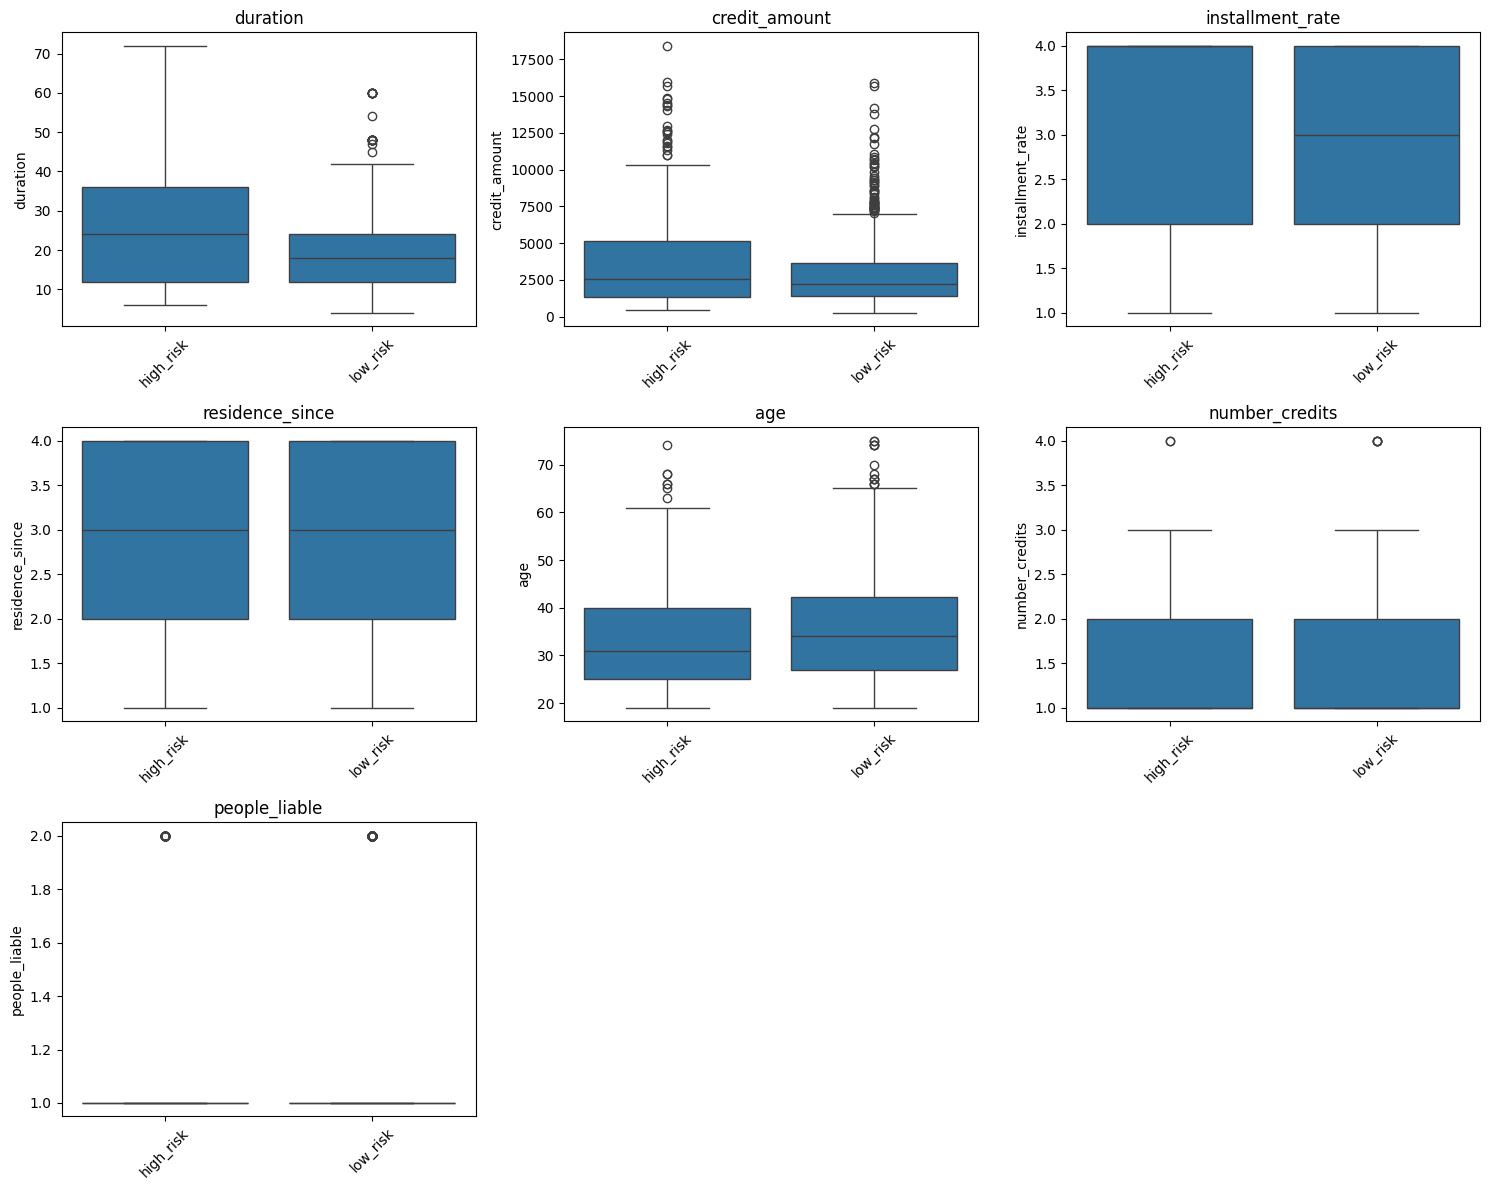

In [16]:
from tp_final_fairness_ML.utils.plotting import graficar_columnas

num_cols = ['duration', 'credit_amount', 'installment_rate', 'residence_since',
            'age', 'number_credits', 'people_liable']

graficar_columnas(g_credit_data, num_cols, 'target_label', 'boxplot')

De estos gráficos de caja podemos sacar algunas observaciones:

* Entre los solicitantes que fueron clasificados con alto riesgo crediticio, los préstamos que solicitaron tuvieron una mediana de duración mayor que aquellos préstamos pertenecientes a personas clasificadas con bajo riesgo crediticio.

* Aunque tienen una mediana similar, el monto del préstamo tiende a ser ligeramente mayor en aquellos solicitantes que fueron clasificados con alto riesgo.

* La mediana de edad de aquellos que fueron clasificados como solicitantes de bajo riesgo es mayor a la de aquellos que fueron clasificados con alto riesgo.

Un último aspecto que resulta interesante observar con las variables numéricas es una matriz de correlación. Con esto podremos identificar aquellas variables que se muestren correlacionadas con la variable objetivo:

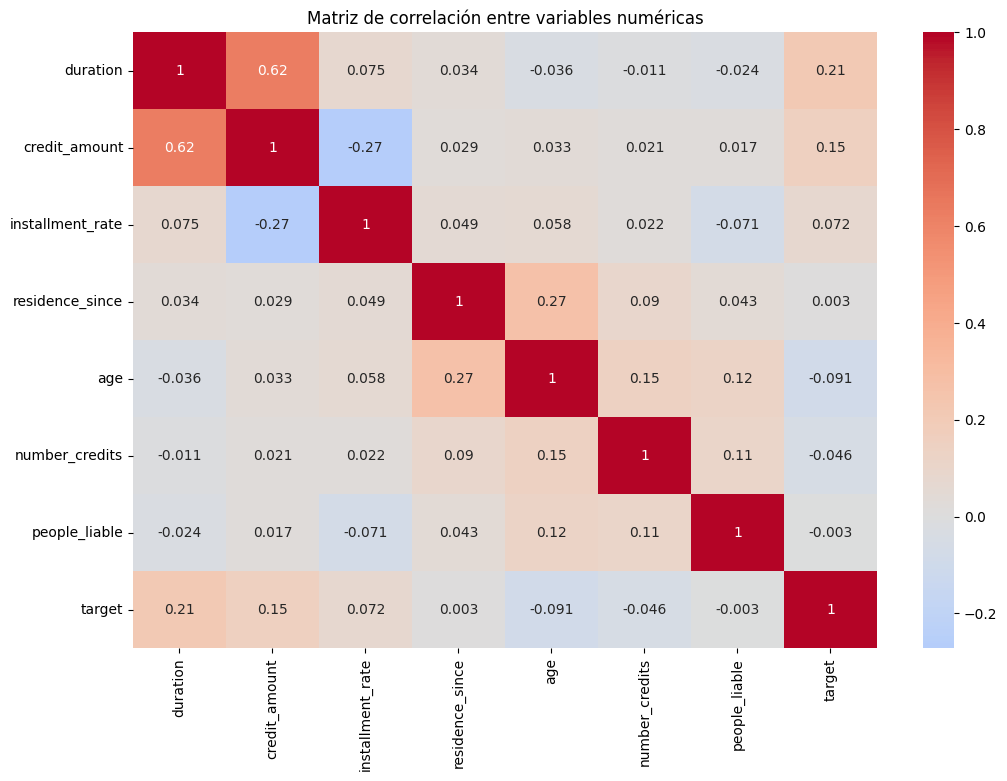

In [17]:
lista_matriz = num_cols + ['target']

corr_matrix = g_credit_data[lista_matriz].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

De esta matriz podemos ver que en general las correlaciones entre variables son débiles tanto en el sentido positivo como negativo. Sin embargo hay detalles que podemos destacar:

* La duración del préstamo resultó ser la variable con mayor correlación con la variable objetivo, esto tiene sentido con lo observado anteriormente en los gráficos de caja.

* Por otro lado el monto del préstamo también resultó ser una de las variables con más correlación con la variable objetivo, confirmando también lo observado en los gráficos de caja.

Fuera de estos puntos vemos que no existen más correlaciones a destacar entre las variables numéricas.

Con este análisis sobre las variables numéricas obtuvimos un mejor entendimiento de la información que tenemos, ahora como siguiente paso analizaremos a las variables categóricas.

## Variables categóricas

Ahora continuando este análisis exploratorio vamos a analizar a las variables categóricas presentes en el conjunto de datos. De vuelta, como primer acercamiento siempre es bueno usar la función ".describe()" pero ahora enfocado en variables categóricas:

In [18]:
g_credit_data.describe(include='category')

,checking_account,credit_history,purpose,savings_account,employment_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,genre,target_label
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2,2
top,no account,paid duly till now,radio/TV,< 100 DM,1 <= ... < 4 years,"male, single",none,car / other,none,own,skilled / official,none,yes,male,low_risk
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,690,700


Esta función, si lo pensamos en ese sentido, nos muestra las características cualitativas del "solicitante promedio" de un préstamo en el banco. A partir de esto podemos resaltar algunos puntos:

* Al momento de solicitar un préstamo, un solicitante suele tener todos sus préstamos pagados debidamente.
* Los solicitantes son mayormente hombres solteros.
* Los solicitantes en gran mayoría son dueños de la casa que habitan.
* Los solicitantes en gran mayoría tienen trabajos estables.
* La mayoría son trabajadores extranjeros.
* Y como habíamos visto en los gráficos de caja anteriormente, la mayoría de los solicitantes tienen un bajo riesgo crediticio.

Ahora y al igual que hicimos con las variables numéricas vamos a observar como se distribuyen las variables categóricas respecto de la variable objetivo haciendo uso en este caso de gráficos de barra.

Una aclaración importante es que para este conjunto de gráficos voy a dejar afuera a la variable que registra datos sobre el género del solicitante ya que esta es nuestro foco principal y será dejado para un análisis a profundidad posterior a este.

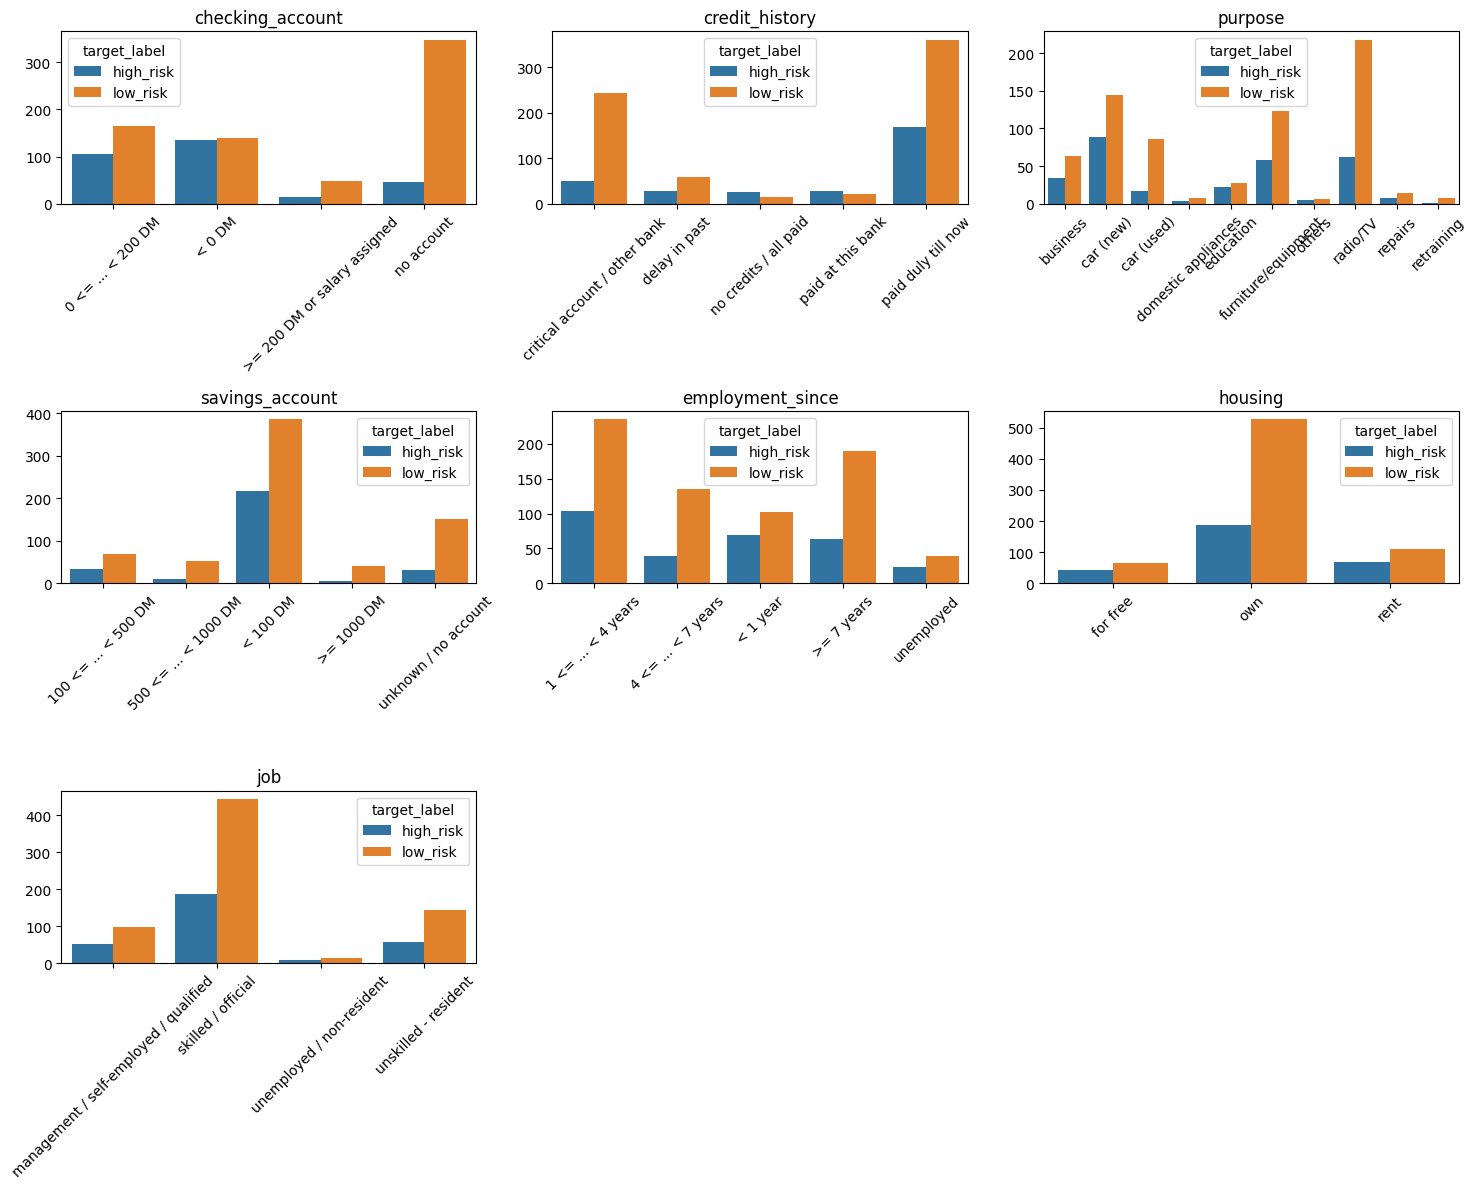

In [19]:
cat_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account',
            'employment_since', 'housing', 'job']

graficar_columnas(g_credit_data, cat_cols, 'target_label', 'countplot')

De estos gráficos sacamos conclusiones más o menos similares a las que sacamos cuando usamos ".describe()", pero con algunos detalles más acerca de aquellos solicitantes clasificados como de alto riesgo:

* Los solicitantes de bajo riesgo suelen no tener cuenta o tener saldos altos. Los de alto riesgo se concentran con saldos bajos.

* En solicitantes con ahorros más bajos (<100 DM) suelen aparecer más de alto riesgo.

* Mayor antigüedad (≥ 4 años) se asocia a buen historial. Los que llevan menos de 1 año o están desempleados tienden a ser de alto riesgo.

* La mayoría de los solicitantes de bajo riesgo son propietarios. Alquilar o vivir gratis es más común entre aquellos solicitantes clasificados como de alto riesgo.

Con todos estos puntos en mente ya tenemos un análisis realizado sobre las variables presentes en nuestro conjunto de datos, logrando identificar aquellas más relevantes para la variable objetivo y aquellas que no tanto.

Ahora como último paso en este análisis exploratorio analizaremos un poco a profundidad a la variable que registra información sobre el género del solicitante.

## Enfocándonos en el género

Ahora entramos en la parte final del EDA que consistirá básicamente en inspeccionar a la variable que registra información sobre el género más a profundidad.

Empecemos por ver la cantidad de solicitantes en cada grupo:

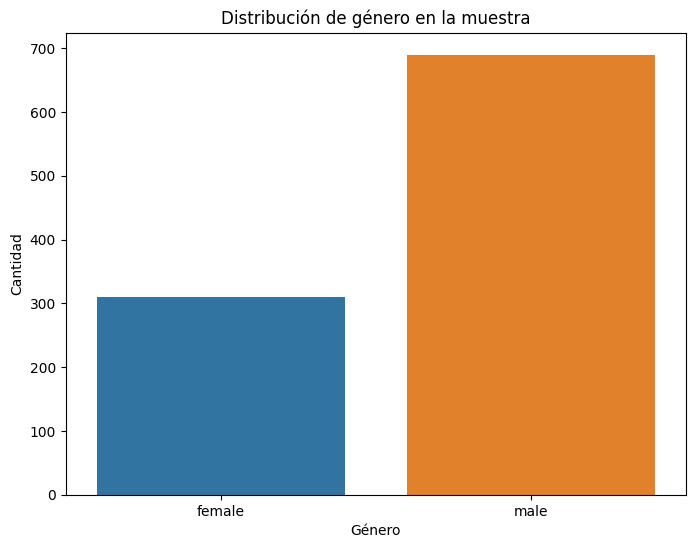

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue= 'genre')
plt.title("Distribución de género en la muestra")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

Tenemos una clara mayoría del género masculino siendo en total 700 solicitantes de este género ante 300 del género femenino.

Veamos ahora estas cantidades respecto de la variable objetivo:

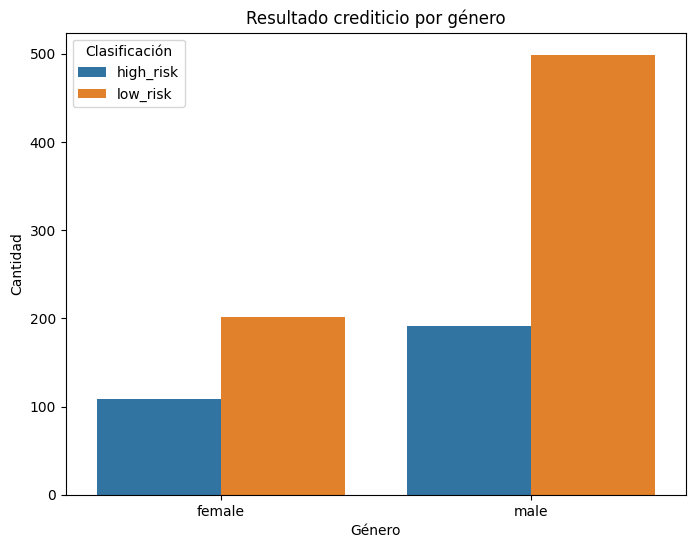

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue='target_label')
plt.title("Resultado crediticio por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Clasificación")
plt.show()

Podemos ver que en el género femenino la diferencia de proporciones entre el bajo o alto riesgo crediticio no está tan marcada como en el género masculino, donde la mayoría son clasificados como de bajo riesgo. Esto nos deja que en términos de proporciones, a las solicitantes femeninas se les suele clasificar como de alto riesgo.

Veamos esto de las proporciones con un gráfico:

C:\Users\gerar\AppData\Local\Temp\ipykernel_14796\1929847499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_genero = g_credit_data.groupby('genre')['target'].apply(lambda x: (x == 2).mean()).reset_index()


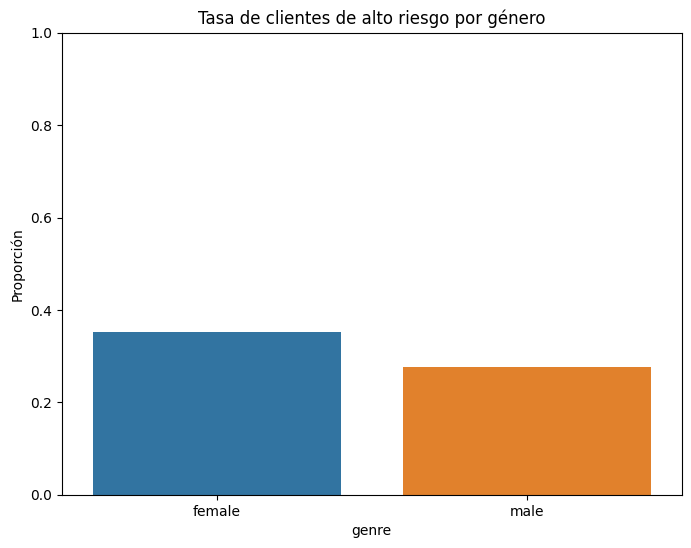

In [22]:
tasa_genero = g_credit_data.groupby('genre')['target'].apply(lambda x: (x == 2).mean()).reset_index()
tasa_genero.columns = ['genre', 'tasa']

plt.figure(figsize=(8, 6))
sns.barplot(data=tasa_genero, x='genre', y='tasa', hue='genre')
plt.title("Tasa de clientes de alto riesgo por género")
plt.ylabel("Proporción")
plt.ylim(0, 1)
plt.show()

In [23]:
tasa_genero

,genre,tasa
0,female,0.351613
1,male,0.276812


A partir del gráfico y mirando la tabla más arriba podemos ver que los solicitantes clasificados como de alto riesgo en mayor parte son femeninos (cosa que ya habíamos notado en los gráficos anteriores). Más precisamente tenemos que la diferencia es de 8 puntos entre géneros.

Considerar estos puntos es clave de cara a la construcción del modelo y evaluación de equidad sobre el mismo. ¿Será que existe un sesgo preestablecido entre las personas que generaron la clasificación originalmente?, ¿podremos evitar ese sesgo en el modelo?.